In [2]:
options(warn=-1)
library(ggplot2)

1. Построить график функции логарифмического правдоподобия (в пункте б) – обычного) для следующих моделей при n = 1, 5, 20, 100, 1000:

(a) 1 вариант – X1, . . . , Xn ∼ N (0, θ)

1


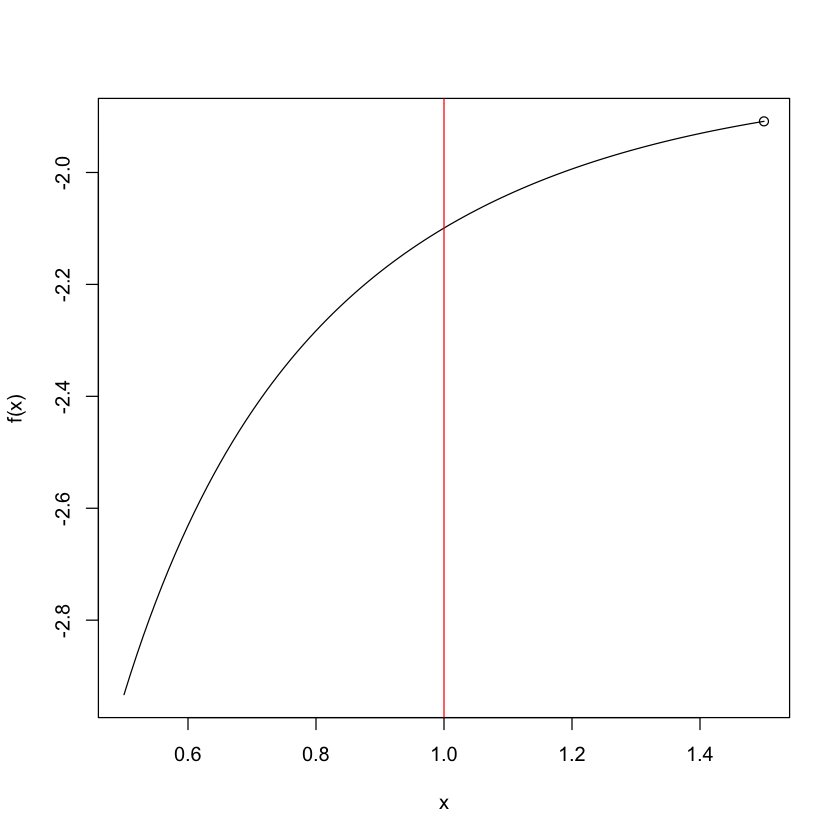

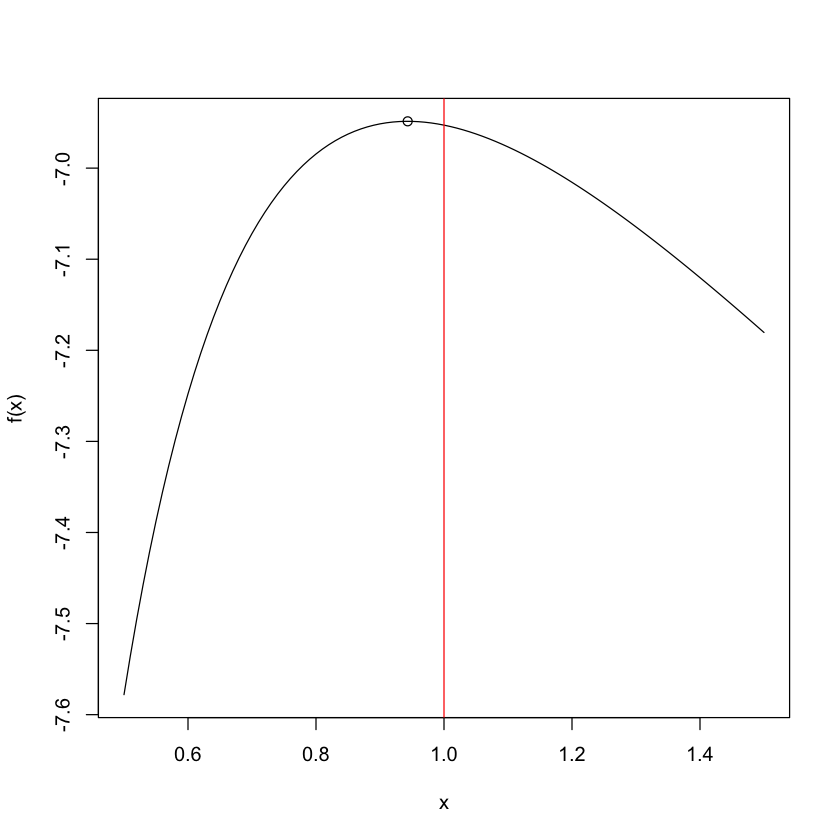

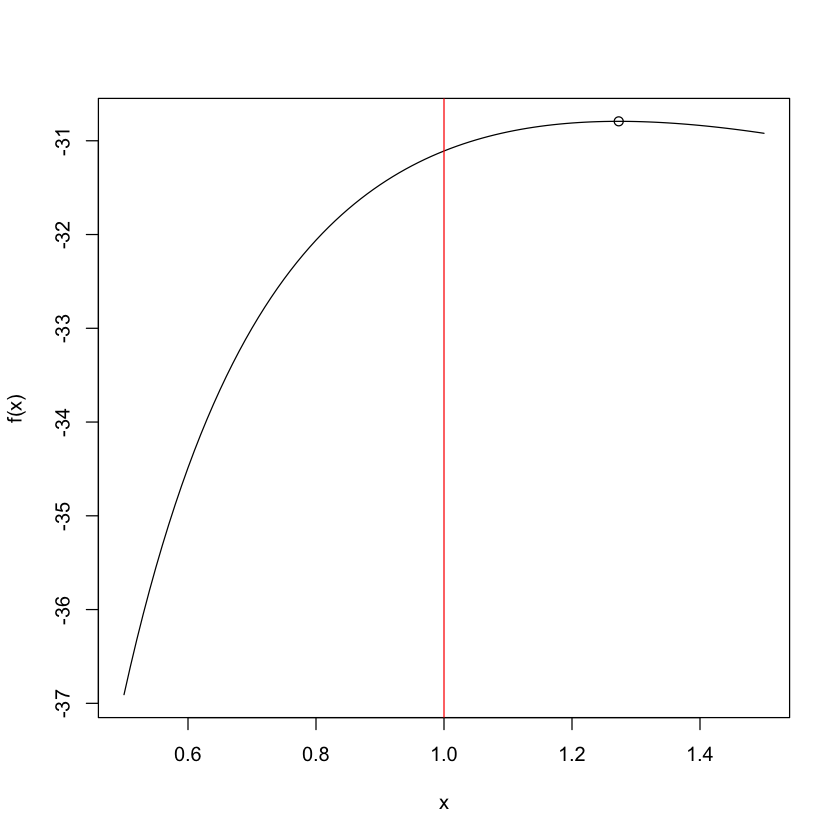

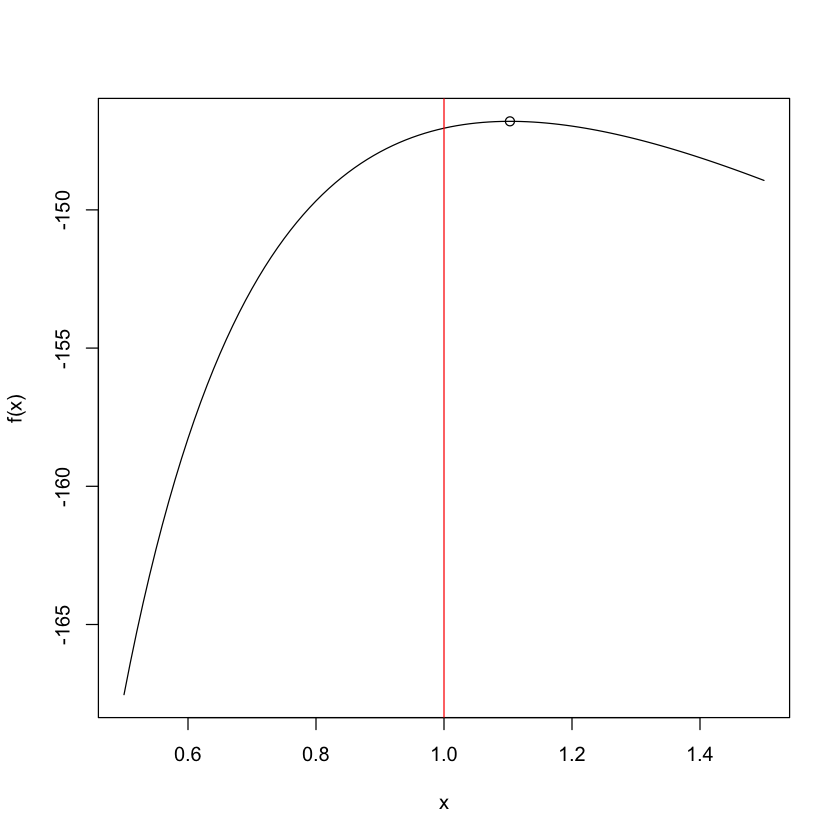

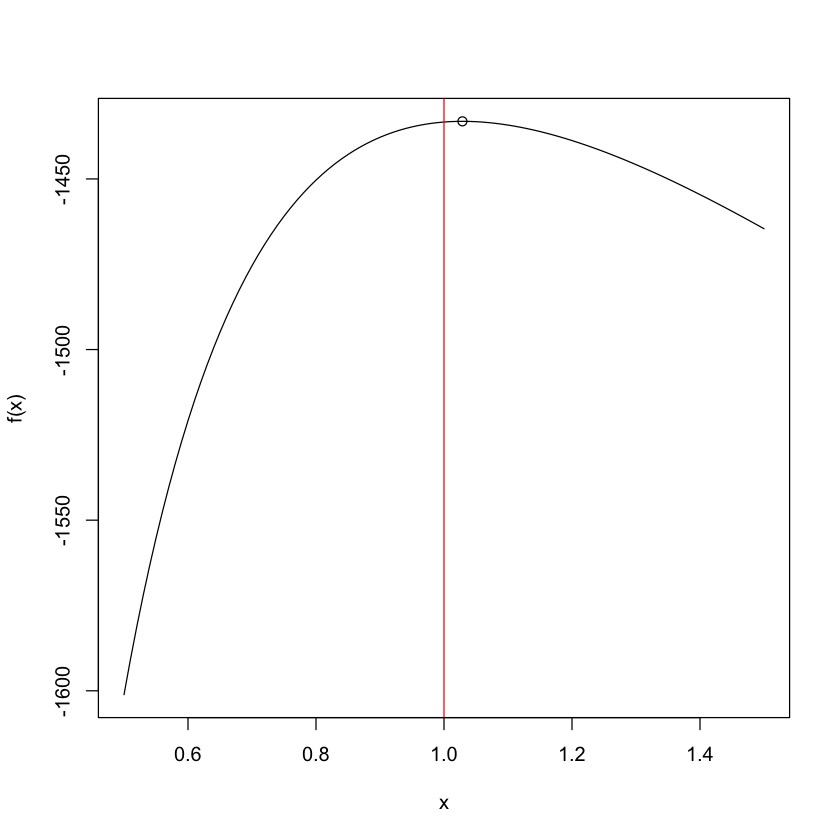

In [3]:
nmas=c(1,5,20,100,1000)
theta=as.double(readline())
for (i in (1:5)){
    n=nmas[i]
    X<-rnorm(n,0,theta^0.5) 
    sum=0
    for (i in (1:n)){
        sum=sum+X[i]^2
    }
    f=function(x){
        -n/2*log(2*pi)-n*log(x^0.5)-sum/2/x
    }
    curve(f,xlim=c(theta/2,3*theta/2))
    abline(v=theta,col='red')
    ans=optimize(f,interval=c(theta/2,3*theta/2),maximum=TRUE)
    points(ans$maximum,ans$objective,add=TRUE)
}

(b) X1, . . . , Xn ∼ R[0, θ].

4


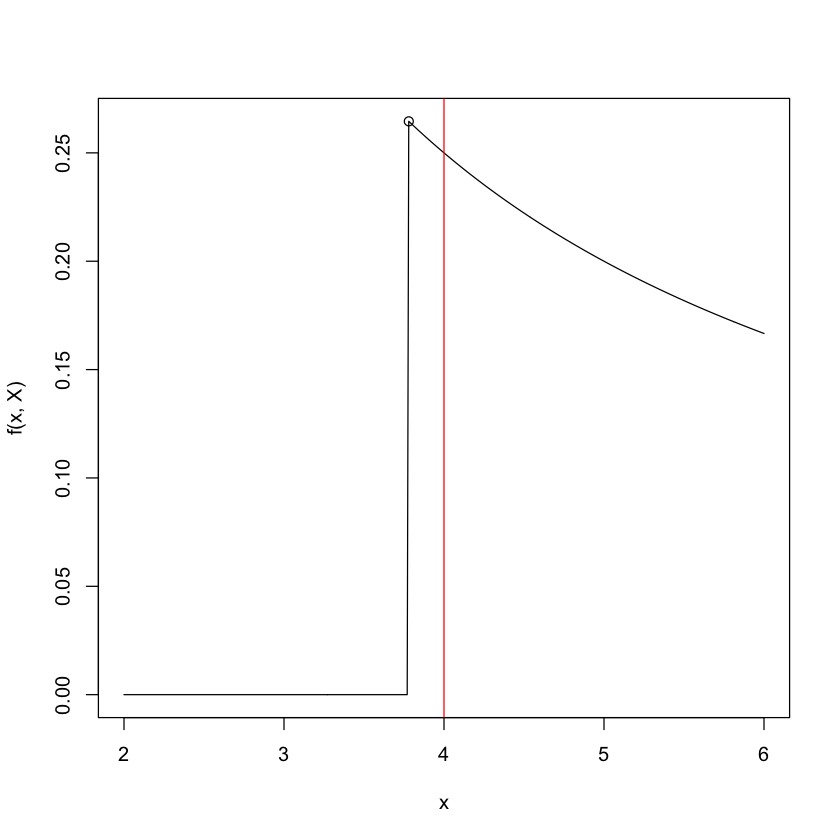

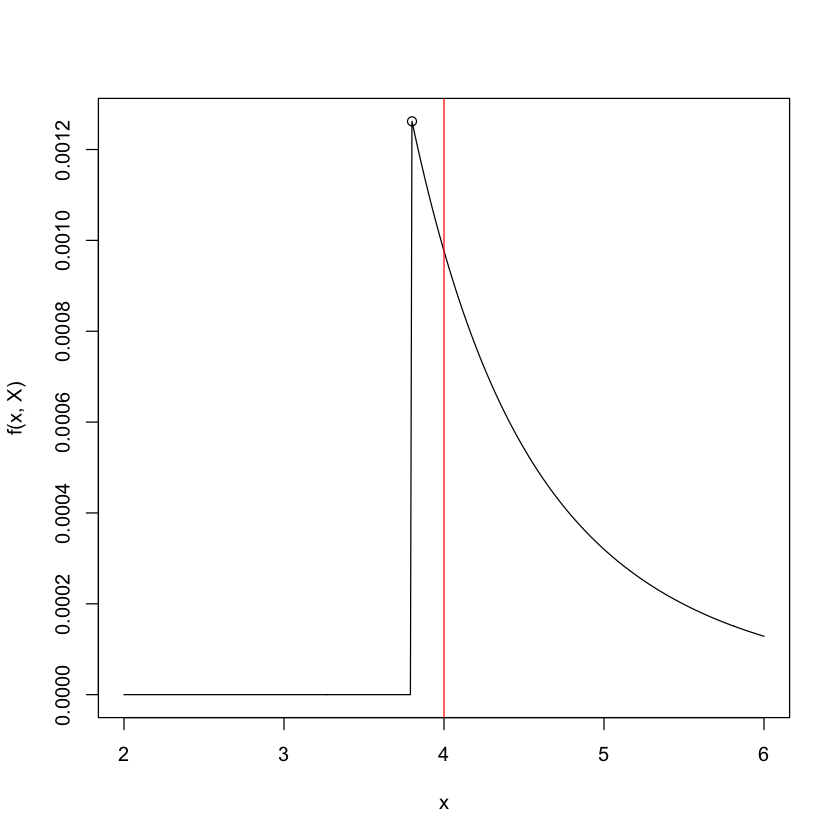

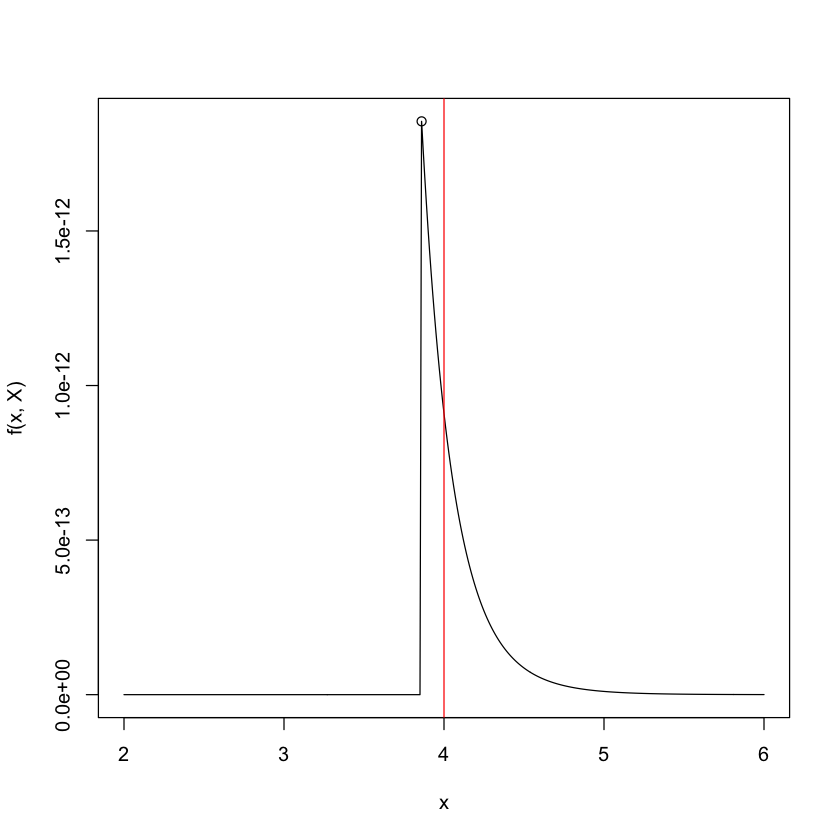

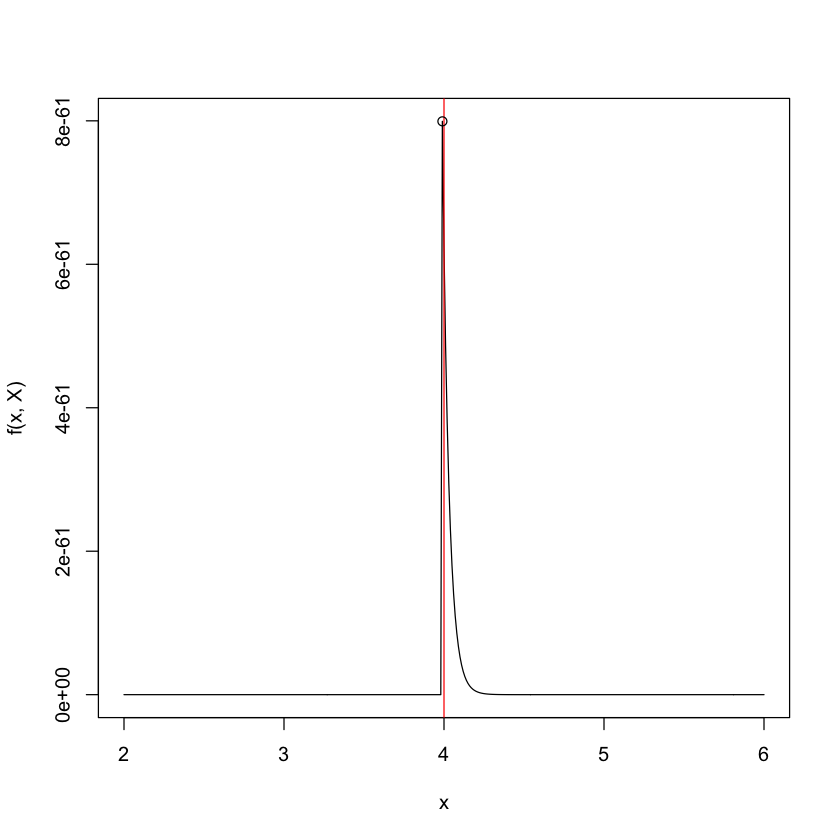

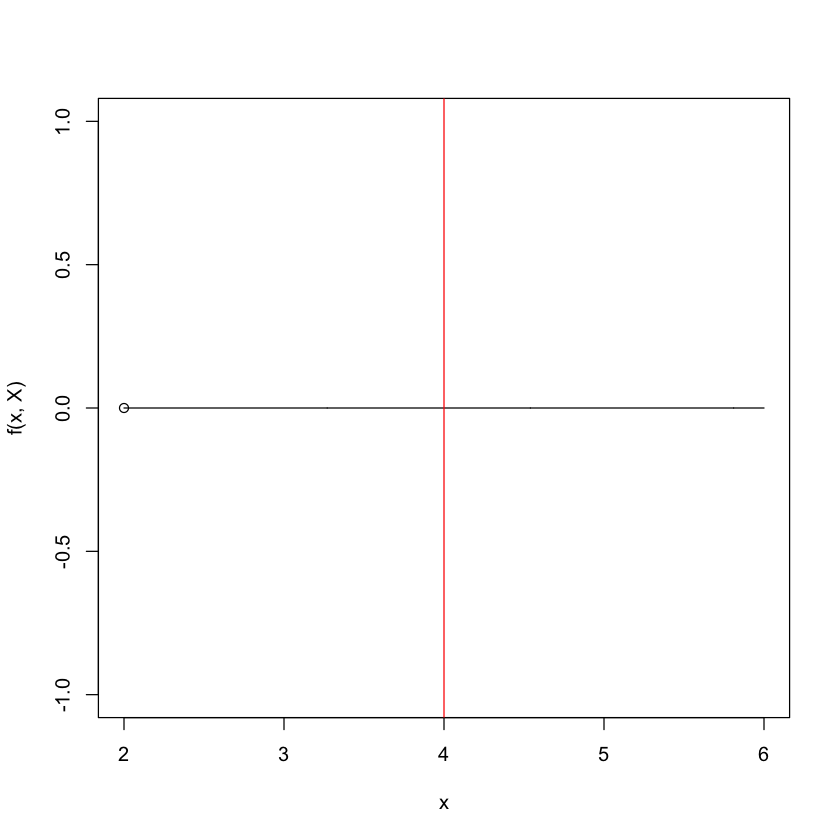

In [4]:
f<-function(x,Y){
    vec=0
    for (j in (1:length(x))){
        vec[j]=0+(x[j]>=max(Y))/x[j]^length(Y)
    }
    return (vec)
}
nmas=c(1,5,20,100,1000)
theta=as.double(readline())
for (i in (1:5)){
    n=nmas[i]
    X<-runif(n,0,theta)
    x=seq(theta/2,3*theta/2,0.01)
    plot(x,f(x,X),ylim=c(0,max(f(x,X))),type='l')
    abline(v=theta,col='red')
    maxVal=f(x[1],X)
    maxArg=1
    for (i in (2:length(x))){
        if (maxVal<f(x[i],X)){
            maxVal=f(x[i],X)
            maxArg=i
        }
    }
    points(x[maxArg],maxVal,add=TRUE)
}

(c) * X1, . . . , Xn – выборка из распределения, являющегося смесью N (θ1, θ2) и N (0, 1) c весами 1/2, 1/2; здесь требуется построить графики L(θ2) при фиксированном значении первого параметра: а) θ1 – настоящее значение (с которым генерировалась выборка), б) θ1 = X1, в) любое число, не равное настоящему значению и не совпадающее ни с одним из элементов выборки.

In [5]:
llh<-function(theta1,theta2,X){
    result=0
    for (i in (1:length(X))){
        result=result+log(1/(2*pi*theta2)^0.5*exp(-(X[i]-theta1)^2/(2*theta2))/2+1/(2*pi)^0.5*exp(-X[i]^2/2)/2)
    }
    return (result)
}
theta1=as.double(readline("theta1 "))
theta2=as.double(readline("theta2 "))
n=strtoi(readline("n "))
X=0
for (i in (1:n)){
    Y<-rbinom(1,1,0.5)
    if (Y==1){
        X[i]<-rnorm(1,0,1)
    }else{
        X[i]<-rnorm(1,theta1,theta2^0.5)
    }
}
print('gotovo')

theta1 7
theta2 4
n 500
[1] "gotovo"


а) θ1 – настоящее значение (с которым генерировалась выборка)

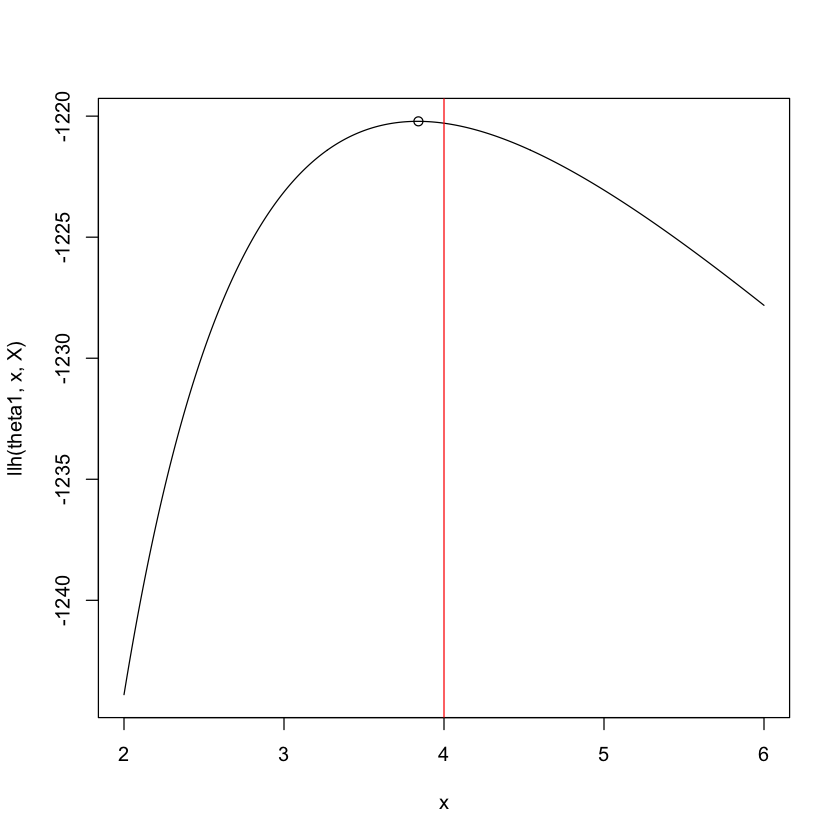

In [6]:
x=seq(theta2/2,theta2*3/2,0.01)
plot(x,llh(theta1,x,X),xlim=c(theta2/2,theta2*3/2),type='l')
maxVal=llh(theta1,x[1],X)
maxArg=1
for (i in (2:length(x))){
    if (maxVal<llh(theta1,x[i],X)){
        maxVal=llh(theta1,x[i],X)
        maxArg=i
    }
}
abline(v=theta2,col='red')
points(x[maxArg],maxVal,add=TRUE)

 б) θ1 = X1

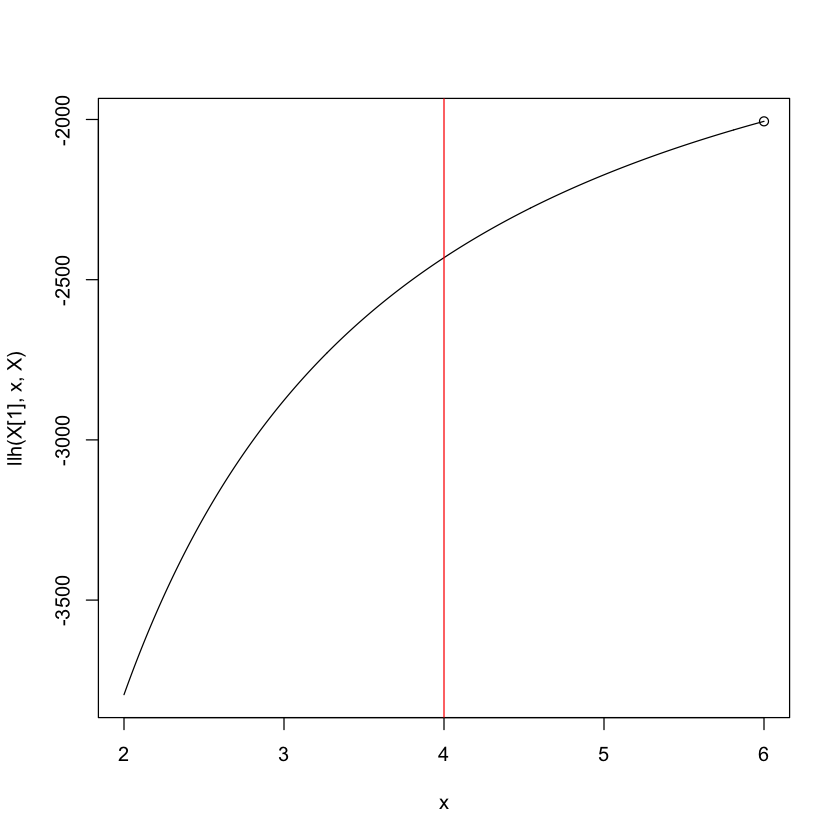

In [7]:
x=seq(theta2/2,theta2*3/2,0.01)
plot(x,llh(X[1],x,X),xlim=c(theta2/2,theta2*3/2),type='l')
maxVal=llh(X[1],x[1],X)
maxArg=1
for (i in (2:length(x))){
    if (maxVal<llh(X[1],x[i],X)){
        maxVal=llh(X[1],x[i],X)
        maxArg=i
    }
}
abline(v=theta2,col='red')
points(x[maxArg],maxVal,add=TRUE)

в) любое число, не равное настоящему значению и не совпадающее ни с одним из элементов выборки.

5


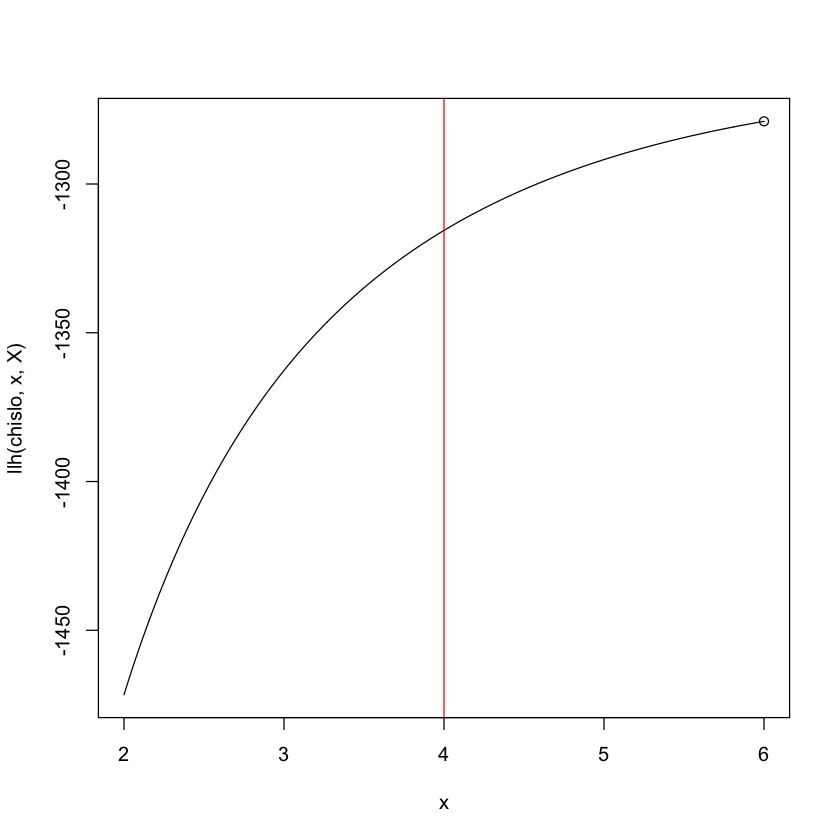

In [8]:
chislo=as.double(readline())
x=seq(theta2/2,theta2*3/2,0.01)
plot(x,llh(chislo,x,X),xlim=c(theta2/2,theta2*3/2),type='l')
maxVal=llh(chislo,x[1],X)
maxArg=1
for (i in (2:length(x))){
    if (maxVal<llh(chislo,x[i],X)){
        maxVal=llh(chislo,x[i],X)
        maxArg=i
    }
}
abline(v=theta2,col='red')
points(x[maxArg],maxVal,add=TRUE)

2. Xi имеют распределение Коши, где неизвестный параметр — сдвиг θ. Построить ОМП по выборке размера n = 5, 10, 20, 50, 100. Для каждого n генерировать k = 500 выборок X1, . . . , Xn, для каждой найти значение ОМП и θb, найти выборочное среднее и выборочную дисперсию ОМП и θb и сравнить их. Здесь θb это выборочная медиана.

mu 0
sc 1


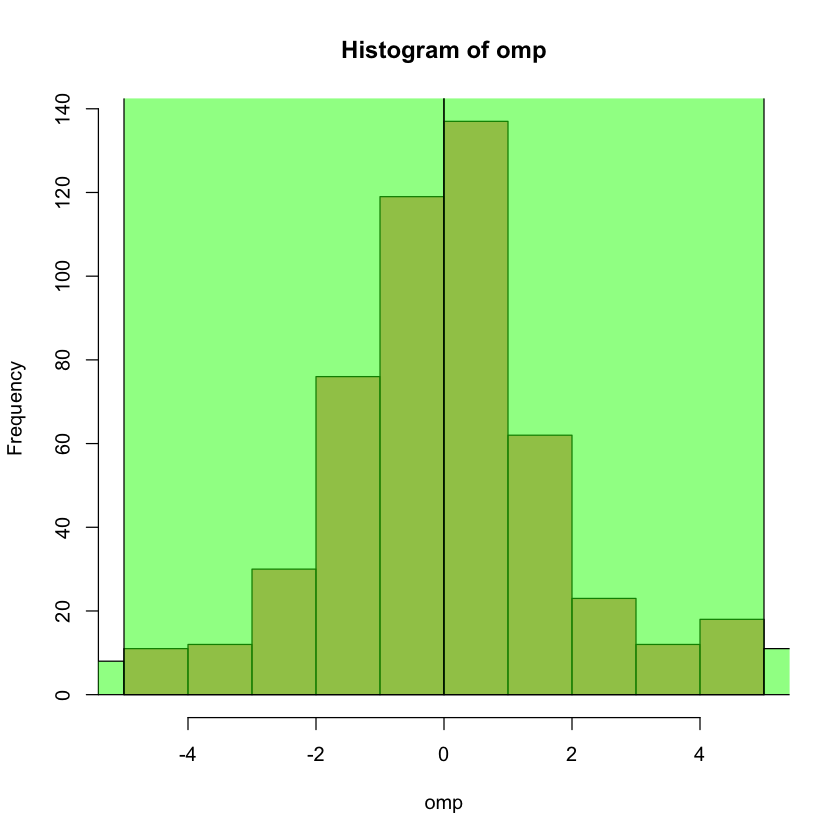

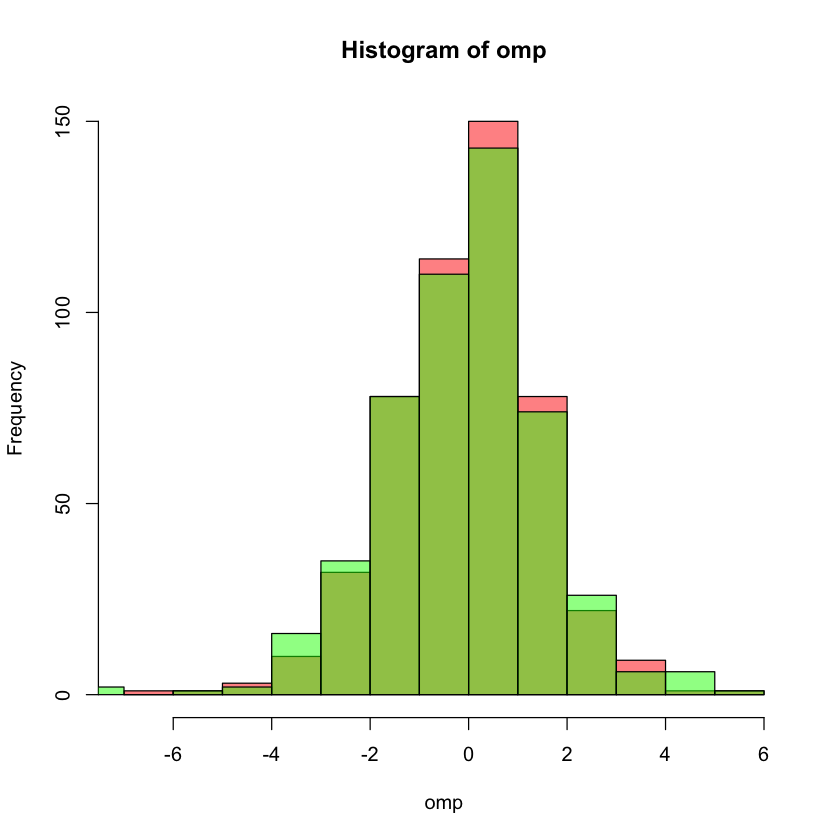

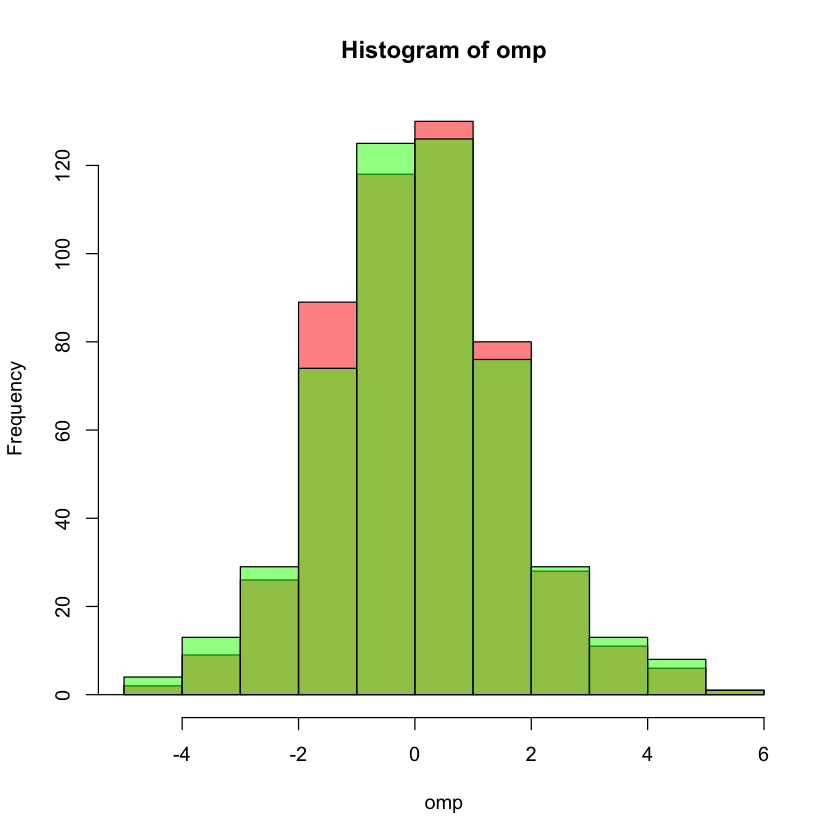

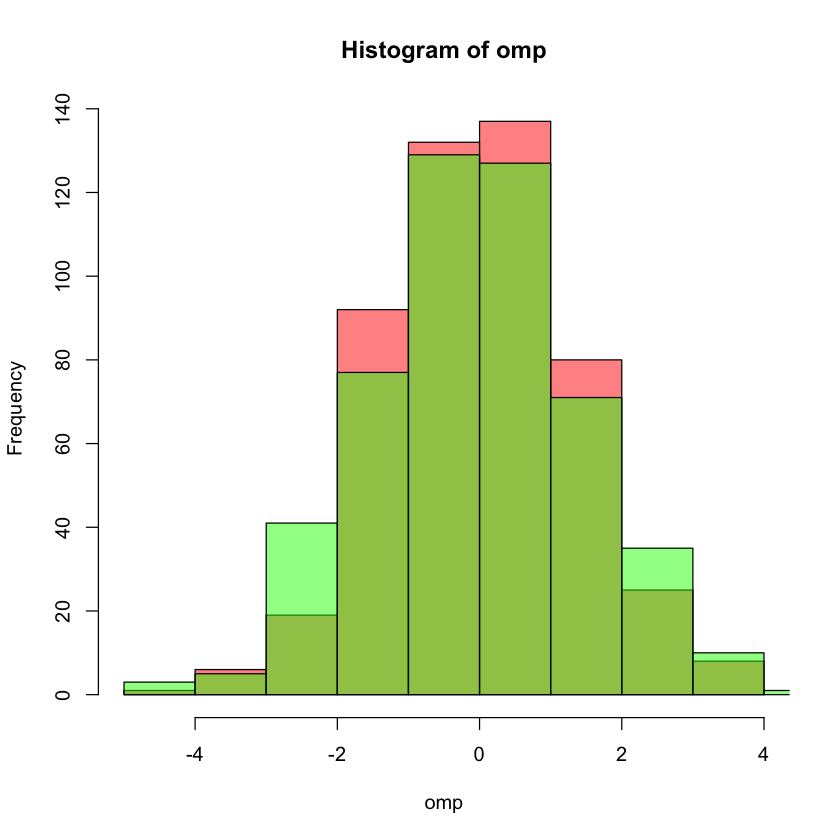

[1] "Mean of MLE"

[1]  0.008192953 -0.051456582  0.083575277  0.010634886  0.044160000

[1] "Variance of MLE"

[1] 3.083042 2.291965 2.304589 1.720666 2.249692

[1] "Mean of MED"

[1]  0.016308379 -0.106567090  0.022331396 -0.008249092  0.016037608

[1] "Variance of MED"

[1] 5.608138 2.706656 2.914928 2.282337 2.711825

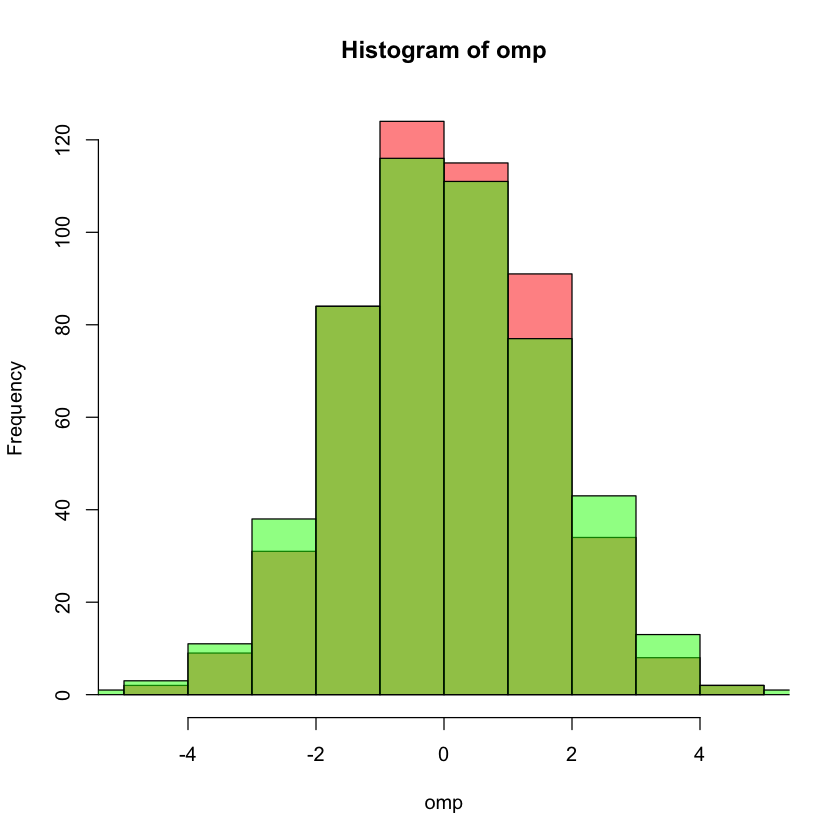

In [9]:
llh<-function(LOC,SCALE,Y){
    result=0
    for (i in (1:length(Y))){
        result=result+log(dcauchy(Y[i],location=LOC,scale=SCALE))
    }
    return (result)
}

nmas=c(5,10,20,50,100,1000)
mu=as.double(readline('mu '))
sc=as.double(readline('sc '))
x=seq(mu-2*sc,mu+2*sc,4*sc/500)
means1=0
variances1=0
means2=0
variances2=0

for (i in (1:5)){
    n=nmas[i]
    thetab=0
    omp=0
    for (j in (1:500)){
        X<-rcauchy(n,location=mu,scale=sc)
        thetab[j]=n^0.5*(median(X)-mu)      
        maxVal=llh(x[1],sc,X)
        maxNum=1
        for (k in (2:length(x))){
            if (llh(x[k],sc,X)>maxVal){
                maxVal=llh(x[k],sc,X)
                maxNum=k
            }
        }
        omp[j]=n^0.5*(x[maxNum]-mu)
    }
    hist(omp,col=rgb(255,0,0,alpha=127,max=255))
    hist(thetab,col=rgb(0,255,0,alpha=127,max=255),add=TRUE)
    means1[i]=mean(omp)
    variances1[i]=var(omp)
    means2[i]=mean(thetab)
    variances2[i]=var(thetab)
}
"Mean of MLE"
means1
"Variance of MLE"
variances1
"Mean of MED"
means2
"Variance of MED"
variances2


3. X1, ..., Xn ∼ N (θ, 1), θb1 – ОММ, θb2 – ОМС, θb3 – ОМП.

In [10]:
llh<-function(theta,X){
    sum=0
    for (i in (1:length(X))){
        sum=sum+(X[i]-theta)^2
    }
    return (-n/2*log(2*pi)-sum/2)
}
lse<-function(theta,X){
    X=sort(X)
    result=log(pnorm(X[1],theta,1))
    for (i in (2:length(X))){
        result=result+log(pnorm(X[i],theta,1)-pnorm(X[i-1],theta,1))
    }
    result=result+log(1-pnorm(X[length(X)],theta,1))
    return (result)
}
thetas<-function(n,theta){
    X<-rnorm(n,theta,1)
    thetab1=mean(X)
    x=seq(theta-3,theta+3,0.01)
    thetab2=x[1]
    maxx=lse(x[1],X)
    for (j in (2:length(x))){
        if (maxx<lse(x[j],X)){
            maxx=lse(x[j],X)
            thetab2=x[j]
        }
    }
    thetab3=x[1]
    maxxx=llh(x[1],X)
    for (j in (2:length(x))){
        if (maxxx<llh(x[j],X)){
            maxxx=llh(x[j],X)
            thetab3=x[j]
        }
    }
    return (c(thetab1,thetab2,thetab3))
}

(a) Построить по выборке θbi, i = 1, 2, 3 (найти численно или аналитически, как удобнее).

In [11]:
n=strtoi(readline())
theta=as.double(readline())
thetas(n,theta)

100
3


[1] 3.127828 3.130000 3.130000

(b) Сравнить, какая из оценок чаще оказывается ближе к θ при разных n, смоделировав для этого по 1000 реализаций (для каждого n).

In [12]:
nmas=c(10)
for (i in (1:length(nmas))){
    n=nmas[i]
    count=c(0,0,0)
    for (k in (1:1000)){
        theta=runif(1,min=-100,max=100)
        mas=thetas(n,theta)
        mas=abs(mas-c(theta,theta,theta))
        count[which.min(mas)]=count[which.min(mas)]+1
    }
    print(n)
    print(count)
}
#MSE

[1] 10
[1] 301 502 197


(c) Построить гистограммы для √n(θbi − θ) на одном графике, сравнить разбросы.

10
4


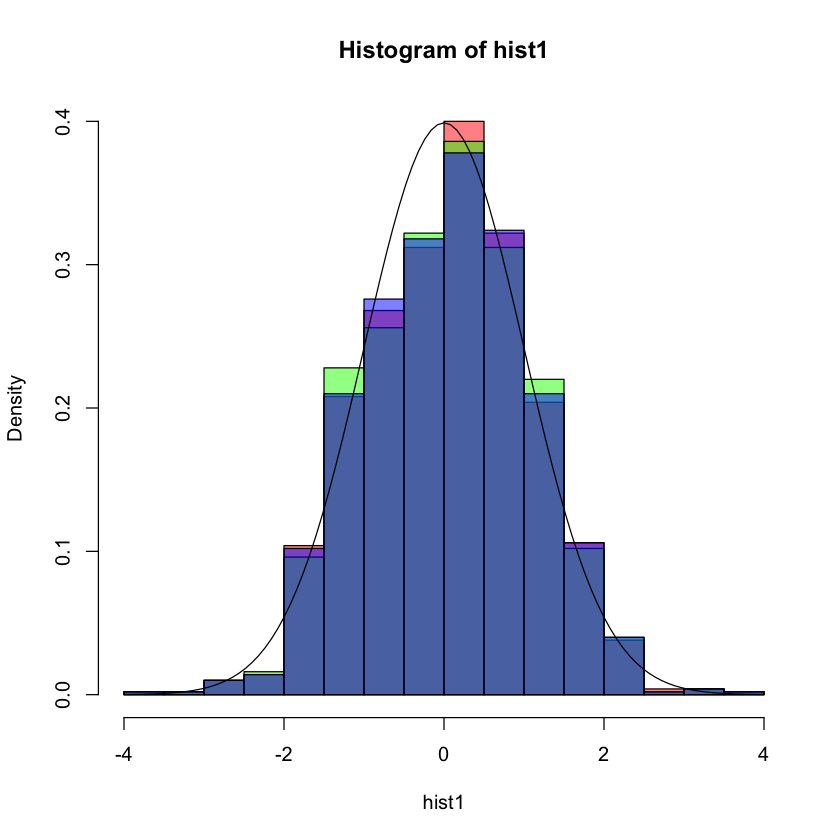

In [18]:
n=strtoi(readline())
theta=as.double(readline())
hist1=0
hist2=0
hist3=0
for (i in (1:1000)){
    thts=thetas(n,theta)
    hist1[i]=n^0.5*(thts[1]-theta)
    hist2[i]=n^0.5*(thts[2]-theta)
    hist3[i]=n^0.5*(thts[3]-theta)
}
hist(hist1,freq=FALSE,col=rgb(255,0,0,alpha=127,max=255))
hist(hist2,freq=FALSE,add=TRUE,col=rgb(0,255,0,alpha=127,max=255))
hist(hist3,freq=FALSE,add=TRUE,col=rgb(0,0,255,alpha=127,max=255))


(d) * Посчитать асимтотическую дисперсию этих оценок, построить график (по θ, сравнить с
выборочной дисперсией (нормированной).